### Text Classification with PySpark
#### MultiClass Text Classification

#### Task
+ predict the crime schedule given the category or text

#### Pyspark
+ pipenv install pyspark


In [1]:
# Load Pkgs
from pyspark import SparkContext

In [3]:
sc = SparkContext(master="local[2]")

23/02/01 13:44:29 WARN Utils: Your hostname, DESKTOP-1ULGF16 resolves to a loopback address: 127.0.1.1; using 172.20.138.93 instead (on interface eth0)
23/02/01 13:44:29 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/02/01 13:44:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
# Launch UI
sc

<SparkContext master=local[2] appName=pyspark-shell>

In [5]:
# Create A Spark Session
from pyspark.sql import SparkSession

In [6]:
spark = SparkSession.builder.appName("CrimeClassifierPySpark").getOrCreate()

In [7]:
# Load Our Dataset
df = spark.read.csv("../Data Storage/Crime Stats-za/crime_stats_schedul.csv",header=True,inferSchema=True)

In [8]:
df.show()

+---+-------------+-----------------+--------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------------+--------------------+
|_c0|     Province|          Station|            Category|2005-2006|2006-2007|2007-2008|2008-2009|2009-2010|2010-2011|2011-2012|2012-2013|2013-2014|2014-2015|2015-2016|Total 2005-2016|      Crime Schedule|
+---+-------------+-----------------+--------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------------+--------------------+
|  0| Western Cape|Cape Town Central|All theft not men...|     6692|     6341|     5966|     5187|     4985|     5127|     5285|     5937|     5600|     5335|     5176|          61631|Schedule 2 or 7 (...|
|  1|      Gauteng|      Jhb Central|All theft not men...|     6093|     4602|     3761|     3610|     3267|     3037|     2886|     2638|     2809|     3050|     2434|        

23/02/01 13:50:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Province, Station, Category, 2005-2006, 2006-2007, 2007-2008, 2008-2009, 2009-2010, 2010-2011, 2011-2012, 2012-2013, 2013-2014, 2014-2015, 2015-2016, Total 2005-2016, Crime Schedule
 Schema: _c0, Province, Station, Category, 2005-2006, 2006-2007, 2007-2008, 2008-2009, 2009-2010, 2010-2011, 2011-2012, 2012-2013, 2013-2014, 2014-2015, 2015-2016, Total 2005-2016, Crime Schedule
Expected: _c0 but found: 
CSV file: file:///mnt/c/Users/Administrator/OneDrive%20-%20csir.co.za/Desktop/Decision%20Making.proj/Code/Decision-Making-Project/Data%20Storage/Crime%20Stats-za/crime_stats_schedul.csv


In [9]:
# Columns
df.columns

['_c0',
 'Province',
 'Station',
 'Category',
 '2005-2006',
 '2006-2007',
 '2007-2008',
 '2008-2009',
 '2009-2010',
 '2010-2011',
 '2011-2012',
 '2012-2013',
 '2013-2014',
 '2014-2015',
 '2015-2016',
 'Total 2005-2016',
 'Crime Schedule']

In [10]:
# Select Columns
df.select('Category','Crime Schedule').show()
# df.select('Category').show()

+--------------------+--------------------+
|            Category|      Crime Schedule|
+--------------------+--------------------+
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|Theft out of or f...|Schedule 2 (polic...|
|  Drug-related crime|Schedule 5 (serio...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|Robbery with aggr...|Schedule 6 (Most ...|
|      Common assault|          Schedule 1|
|All theft not men...|Schedule 2

In [11]:
df = df.select('Category','Crime Schedule')
# df = df.select('Category')

In [12]:
df.show(5)

+--------------------+--------------------+
|            Category|      Crime Schedule|
+--------------------+--------------------+
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
+--------------------+--------------------+
only showing top 5 rows



In [14]:
# Value Counts
df.groupBy('Crime Schedule').count().show()

+--------------------+-----+
|      Crime Schedule|count|
+--------------------+-----+
|          Schedule 1| 2286|
|          Schedule 2| 8001|
|     Schedule 1 or 2| 3429|
|Schedule 3 (minor...| 1143|
|Schedule 5 (serio...| 2286|
|Schedule 2 (polic...| 1143|
|Schedule 6 (most ...| 4572|
|No Schedule Alloc...| 2286|
|Schedule 7 (Prose...| 2286|
|Schedule 2 or 7 (...| 1143|
|          Schedule 5| 1143|
|Schedule 6 (Most ...| 1143|
+--------------------+-----+



In [15]:
# Value Counts via pandas
df.toPandas()['Crime Schedule'].value_counts()

Schedule 2                              8001
Schedule 6 (most serious offences)      4572
Schedule 1 or 2                         3429
Schedule 5 (serious crimes)             2286
Schedule 1                              2286
Schedule 7 (Prosecutorial bail)         2286
No Schedule Allocated                   2286
Schedule 2 or 7 (Prosecutorial bail)    1143
Schedule 2 (police bail)                1143
Schedule 6 (Most Serious Offences)      1143
Schedule 3 (minor offences – fine)      1143
Schedule 5                              1143
Name: Crime Schedule, dtype: int64

In [17]:
# Check For Missing Values
df.toPandas()['Crime Schedule'].isnull().sum()

0

In [18]:
# Drop Missing Values
df = df.dropna(subset=('Crime Schedule'))

In [19]:
# Check For Missing Values
df.toPandas()['Category'].isnull().sum()

0

In [20]:
df.show(5)

+--------------------+--------------------+
|            Category|      Crime Schedule|
+--------------------+--------------------+
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
+--------------------+--------------------+
only showing top 5 rows



### Feature Extraction
#### Build Features From Text
+ CountVectorizer
+ TFIDF
+ WordEmbedding
+ HashingTF
+ etc

In [21]:
# Load Our Pkgs
import pyspark.ml.feature

In [22]:
# View All Available Tranformers, Extractors, Vectorizer
dir(pyspark.ml.feature)

['Binarizer',
 'BucketedRandomProjectionLSH',
 'BucketedRandomProjectionLSHModel',
 'Bucketizer',
 'ChiSqSelector',
 'ChiSqSelectorModel',
 'CountVectorizer',
 'CountVectorizerModel',
 'DCT',
 'ElementwiseProduct',
 'FeatureHasher',
 'HasFeaturesCol',
 'HasHandleInvalid',
 'HasInputCol',
 'HasInputCols',
 'HasLabelCol',
 'HasMaxIter',
 'HasNumFeatures',
 'HasOutputCol',
 'HasOutputCols',
 'HasRelativeError',
 'HasSeed',
 'HasStepSize',
 'HasThreshold',
 'HasThresholds',
 'HashingTF',
 'IDF',
 'IDFModel',
 'Imputer',
 'ImputerModel',
 'IndexToString',
 'Interaction',
 'JavaEstimator',
 'JavaMLReadable',
 'JavaMLWritable',
 'JavaModel',
 'JavaParams',
 'JavaTransformer',
 'MaxAbsScaler',
 'MaxAbsScalerModel',
 'MinHashLSH',
 'MinHashLSHModel',
 'MinMaxScaler',
 'MinMaxScalerModel',
 'NGram',
 'Normalizer',
 'OneHotEncoder',
 'OneHotEncoderModel',
 'PCA',
 'PCAModel',
 'Param',
 'Params',
 'PolynomialExpansion',
 'QuantileDiscretizer',
 'RFormula',
 'RFormulaModel',
 'RegexTokenizer',
 'R

In [23]:
# Load Our Transformer & Extractor Pkgs
from pyspark.ml.feature import Tokenizer,StopWordsRemover,CountVectorizer,IDF
from pyspark.ml.feature import StringIndexer

In [24]:
df.show(5)

+--------------------+--------------------+
|            Category|      Crime Schedule|
+--------------------+--------------------+
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
+--------------------+--------------------+
only showing top 5 rows



In [25]:
# Stages For the Pipeline
tokenizer = Tokenizer(inputCol='Category',outputCol='mytokens')
stopwords_remover = StopWordsRemover(inputCol='mytokens',outputCol='filtered_tokens')
vectorizer = CountVectorizer(inputCol='filtered_tokens',outputCol='rawFeatures')
idf = IDF(inputCol='rawFeatures',outputCol='vectorizedFeatures')



In [26]:
# LabelEncoding/LabelIndexing
labelEncoder = StringIndexer(inputCol='Crime Schedule',outputCol='label').fit(df)

In [27]:
labelEncoder.transform(df).show(5)

+--------------------+--------------------+-----+
|            Category|      Crime Schedule|label|
+--------------------+--------------------+-----+
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
+--------------------+--------------------+-----+
only showing top 5 rows



In [28]:
labelEncoder.labels

['Schedule 2',
 'Schedule 6 (most serious offences)',
 'Schedule 1 or 2',
 'No Schedule Allocated',
 'Schedule 1',
 'Schedule 5 (serious crimes)',
 'Schedule 7 (Prosecutorial bail)',
 'Schedule 2 (police bail)',
 'Schedule 2 or 7 (Prosecutorial bail)',
 'Schedule 3 (minor offences – fine)',
 'Schedule 5',
 'Schedule 6 (Most Serious Offences)']

In [29]:
# Dict of Labels

label_dict = {'Schedule 2':0.0,
 'Schedule 6 (most serious offences)':1.0,
 'Schedule 1 or 2':2.0,
 'No Schedule Allocated':3.0,
 'Schedule 1':4.0,
 'Schedule 5 (serious crimes)':5.0,
 'Schedule 7 (Prosecutorial bail)':6.0,
 'Schedule 2 (police bail)':7.0,
 'Schedule 2 or 7 (Prosecutorial bail)':8.0,
 'Schedule 3 (minor offences – fine)':9.0,
 'Schedule 5':10.0,
 'Schedule 6 (Most Serious Offences)':11.0}

In [30]:
df.show()

+--------------------+--------------------+
|            Category|      Crime Schedule|
+--------------------+--------------------+
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|Theft out of or f...|Schedule 2 (polic...|
|  Drug-related crime|Schedule 5 (serio...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|All theft not men...|Schedule 2 or 7 (...|
|Robbery with aggr...|Schedule 6 (Most ...|
|      Common assault|          Schedule 1|
|All theft not men...|Schedule 2

In [31]:
df = labelEncoder.transform(df)

In [33]:
df.show(20)

+--------------------+--------------------+-----+
|            Category|      Crime Schedule|label|
+--------------------+--------------------+-----+
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|Theft out of or f...|Schedule 2 (polic...|  7.0|
|  Drug-related crime|Schedule 5 (serio...|  5.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|


In [34]:
### Split Dataset
(trainDF,testDF) = df.randomSplit((0.7,0.3),seed=42)

In [40]:
trainDF.show()

+--------------------+--------------------+-----+
|            Category|      Crime Schedule|label|
+--------------------+--------------------+-----+
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|


In [41]:
### Estimator
from pyspark.ml.classification import LogisticRegression

In [42]:
# Create Estimator
lr = LogisticRegression(featuresCol='vectorizedFeatures',labelCol='label')

#### Building the Pipeline

In [43]:
# Load Pkgs
from pyspark.ml import Pipeline

In [44]:
# Create Pipeline
pipeline = Pipeline(stages=[tokenizer,stopwords_remover,vectorizer,idf,lr])

In [45]:
pipeline

Pipeline_33ec6770ba2a

In [46]:
pipeline.stages

Param(parent='Pipeline_33ec6770ba2a', name='stages', doc='a list of pipeline stages')

In [48]:
# Building MOdel
lr_model = pipeline.fit(trainDF)

In [49]:
lr_model

PipelineModel_7714435a91a7

In [50]:
# Predictions on our Test Dataset
predictions = lr_model.transform(testDF)

In [51]:
predictions.show()

+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|            Category|      Crime Schedule|label|            mytokens|     filtered_tokens|         rawFeatures|  vectorizedFeatures|       rawPrediction|         probability|prediction|
+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|All theft not men...|Schedule 2 or 7 (...|  8.0|[all, theft, not,...|[theft, mentioned...|(50,[2,14,15],[1....|(50,[2,14,15],[2....|[-2.9633759566258...|[5.12017999125737...|       8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|[all, theft, not,...|[theft, mentioned...|(50,[2,14,15],[1....|(50,[2,14,15],[2....|[-2.9633759566258...|[5.12017999125737...|       8.0|
|All theft not men...|Schedule 2 or 7 (...|  8.0|[all, theft, not

In [52]:
# Select Columns
predictions.columns

['Category',
 'Crime Schedule',
 'label',
 'mytokens',
 'filtered_tokens',
 'rawFeatures',
 'vectorizedFeatures',
 'rawPrediction',
 'probability',
 'prediction']

In [53]:
predictions.select('rawPrediction','probability','Crime Schedule','label','prediction').show(10)

+--------------------+--------------------+--------------------+-----+----------+
|       rawPrediction|         probability|      Crime Schedule|label|prediction|
+--------------------+--------------------+--------------------+-----+----------+
|[-2.9633759566258...|[5.12017999125737...|Schedule 2 or 7 (...|  8.0|       8.0|
|[-2.9633759566258...|[5.12017999125737...|Schedule 2 or 7 (...|  8.0|       8.0|
|[-2.9633759566258...|[5.12017999125737...|Schedule 2 or 7 (...|  8.0|       8.0|
|[-2.9633759566258...|[5.12017999125737...|Schedule 2 or 7 (...|  8.0|       8.0|
|[-2.9633759566258...|[5.12017999125737...|Schedule 2 or 7 (...|  8.0|       8.0|
|[-2.9633759566258...|[5.12017999125737...|Schedule 2 or 7 (...|  8.0|       8.0|
|[-2.9633759566258...|[5.12017999125737...|Schedule 2 or 7 (...|  8.0|       8.0|
|[-2.9633759566258...|[5.12017999125737...|Schedule 2 or 7 (...|  8.0|       8.0|
|[-2.9633759566258...|[5.12017999125737...|Schedule 2 or 7 (...|  8.0|       8.0|
|[-2.96337595662

### Model Evaluation (Accuracy Scores)
+ Accuracy
+ Precision
+ F1score
+ etc


In [63]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [56]:
evaluator = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='accuracy')

In [57]:
accuracy = evaluator.evaluate(predictions)

In [58]:
accuracy

1.0

In [59]:
#### Method 2: Precision. F1Score (Classification Report)
from pyspark.mllib.evaluation import MulticlassMetrics

In [60]:
lr_metric = MulticlassMetrics(predictions['label','prediction'].rdd)

/home/marsh/anaconda3/envs/csir-env/lib/python3.9/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [61]:
print("Accuracy:",lr_metric.accuracy)
print("Precision:",lr_metric.precision(1.0))
print("Recall:",lr_metric.recall(1.0))
print("F1Score:",lr_metric.fMeasure(1.0))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1Score: 1.0


### Confusion Matrix
+ convert to pandas
+ sklearn

In [64]:
y_true = predictions.select('label')
y_true = y_true.toPandas()
y_pred = predictions.select('prediction')
y_pred = y_pred.toPandas()

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
cm = confusion_matrix(y_true,y_pred)

In [67]:
cm

array([[2396,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0, 1368,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0, 1054,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,  651,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,  725,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,  693,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,  679,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,  338,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  301,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  316,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  324,
           0],
       [   0,    0,  

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [68]:
label_dict.keys()

dict_keys(['Schedule 2', 'Schedule 6 (most serious offences)', 'Schedule 1 or 2', 'No Schedule Allocated', 'Schedule 1', 'Schedule 5 (serious crimes)', 'Schedule 7 (Prosecutorial bail)', 'Schedule 2 (police bail)', 'Schedule 2 or 7 (Prosecutorial bail)', 'Schedule 3 (minor offences – fine)', 'Schedule 5', 'Schedule 6 (Most Serious Offences)'])

In [70]:
class_names = ['Schedule 2',
 'Schedule 6 (most serious offences)',
 'Schedule 1 or 2',
 'No Schedule Allocated',
 'Schedule 1',
 'Schedule 5 (serious crimes)',
 'Schedule 7 (Prosecutorial bail)',
 'Schedule 2 (police bail)',
 'Schedule 2 or 7 (Prosecutorial bail)',
 'Schedule 3 (minor offences – fine)',
 'Schedule 5',
 'Schedule 6 (Most Serious Offences)']

Confusion matrix, without normalization
[[2396    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1368    0    0    0    0    0    0    0    0    0    0]
 [   0    0 1054    0    0    0    0    0    0    0    0    0]
 [   0    0    0  651    0    0    0    0    0    0    0    0]
 [   0    0    0    0  725    0    0    0    0    0    0    0]
 [   0    0    0    0    0  693    0    0    0    0    0    0]
 [   0    0    0    0    0    0  679    0    0    0    0    0]
 [   0    0    0    0    0    0    0  338    0    0    0    0]
 [   0    0    0    0    0    0    0    0  301    0    0    0]
 [   0    0    0    0    0    0    0    0    0  316    0    0]
 [   0    0    0    0    0    0    0    0    0    0  324    0]
 [   0    0    0    0    0    0    0    0    0    0    0  348]]


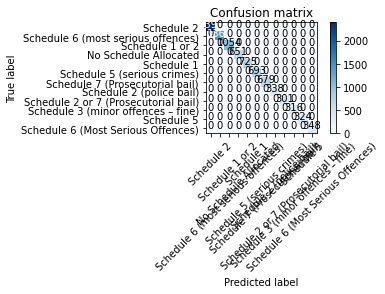

In [71]:
plot_confusion_matrix(cm,class_names)

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
# Classication Report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2396
         1.0       1.00      1.00      1.00      1368
         2.0       1.00      1.00      1.00      1054
         3.0       1.00      1.00      1.00       651
         4.0       1.00      1.00      1.00       725
         5.0       1.00      1.00      1.00       693
         6.0       1.00      1.00      1.00       679
         7.0       1.00      1.00      1.00       338
         8.0       1.00      1.00      1.00       301
         9.0       1.00      1.00      1.00       316
        10.0       1.00      1.00      1.00       324
        11.0       1.00      1.00      1.00       348

    accuracy                           1.00      9193
   macro avg       1.00      1.00      1.00      9193
weighted avg       1.00      1.00      1.00      9193



In [74]:
# Classication Report
print(classification_report(y_true,y_pred,target_names=class_names))

                                      precision    recall  f1-score   support

                          Schedule 2       1.00      1.00      1.00      2396
  Schedule 6 (most serious offences)       1.00      1.00      1.00      1368
                     Schedule 1 or 2       1.00      1.00      1.00      1054
               No Schedule Allocated       1.00      1.00      1.00       651
                          Schedule 1       1.00      1.00      1.00       725
         Schedule 5 (serious crimes)       1.00      1.00      1.00       693
     Schedule 7 (Prosecutorial bail)       1.00      1.00      1.00       679
            Schedule 2 (police bail)       1.00      1.00      1.00       338
Schedule 2 or 7 (Prosecutorial bail)       1.00      1.00      1.00       301
  Schedule 3 (minor offences – fine)       1.00      1.00      1.00       316
                          Schedule 5       1.00      1.00      1.00       324
  Schedule 6 (Most Serious Offences)       1.00      1.00      

In [75]:
class_temp = predictions.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
# # # print(class_name)
class_names

### Making Single Prediction
+ sample as DF
+ apply pipeline

In [85]:
from pyspark.sql.types import StringType

In [113]:
ex1 = spark.createDataFrame([
    ("unlawful and intentional killing of a human being",StringType())
],
# Column Name
["Category"]

)

In [114]:
ex1.show()

+--------------------+---+
|            Category| _2|
+--------------------+---+
|unlawful and inte...| {}|
+--------------------+---+



In [115]:
# Show Full 
ex1.show(truncate=False)

+-------------------------------------------------+---+
|Category                                         |_2 |
+-------------------------------------------------+---+
|unlawful and intentional killing of a human being|{} |
+-------------------------------------------------+---+



In [116]:
# Predict
pred_ex1 = lr_model.transform(ex1)

In [117]:
pred_ex1.show()

+--------------------+---+--------------------+--------------------+-----------+------------------+--------------------+--------------------+----------+
|            Category| _2|            mytokens|     filtered_tokens|rawFeatures|vectorizedFeatures|       rawPrediction|         probability|prediction|
+--------------------+---+--------------------+--------------------+-----------+------------------+--------------------+--------------------+----------+
|unlawful and inte...| {}|[unlawful, and, i...|[unlawful, intent...| (50,[],[])|        (50,[],[])|[4.66059209546335...|[0.55629006363515...|       0.0|
+--------------------+---+--------------------+--------------------+-----------+------------------+--------------------+--------------------+----------+



In [118]:
pred_ex1.columns

['Category',
 '_2',
 'mytokens',
 'filtered_tokens',
 'rawFeatures',
 'vectorizedFeatures',
 'rawPrediction',
 'probability',
 'prediction']

In [119]:
pred_ex1.select('Category','rawPrediction','probability','prediction').show()

+--------------------+--------------------+--------------------+----------+
|            Category|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|unlawful and inte...|[4.66059209546335...|[0.55629006363515...|       0.0|
+--------------------+--------------------+--------------------+----------+



In [ ]:
label_dict

{'Schedule 2': 0.0,
 'Schedule 6 (most serious offences)': 1.0,
 'Schedule 1 or 2': 2.0,
 'No Schedule Allocated': 3.0,
 'Schedule 1': 4.0,
 'Schedule 5 (serious crimes)': 5.0,
 'Schedule 7 (Prosecutorial bail)': 6.0,
 'Schedule 2 (police bail)': 7.0,
 'Schedule 2 or 7 (Prosecutorial bail)': 8.0,
 'Schedule 3 (minor offences – fine)': 9.0,
 'Schedule 5': 10.0,
 'Schedule 6 (Most Serious Offences)': 11.0}

### Save and Load Model

In [120]:
# Saving Model
modelPath = "../Apps/models/crime_lr_model_1_Feb_2022"
lr_model.save(modelPath)

In [121]:
# Loading pickled model via pipeline api
from pyspark.ml.pipeline import PipelineModel
persistedModel = PipelineModel.load(modelPath)

#### Method 2: Save as Pickle


In [125]:
import joblib

In [ ]:
joblib.dump(lr_model, "test_model.pkl")